In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. Implementación de los algoritmos Erdős–Rényi y Barabási-Albert

In [4]:
# Implementación de Erdős–Rényi
def erdos_renyi(n, p):
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                edges.append((i, j))
    return edges

In [5]:
# Función para asegurar que el grafo sea conexo
def generate_connected_erdos_renyi(n, p):
    while True:
        graph = nx.Graph(erdos_renyi(n, p))
        if nx.is_connected(graph):
            return graph

In [6]:
# Implementación de Barabási-Albert
def barabasi_albert(n, m):
    edges = []
    initial_nodes = list(range(m))
    for i in range(m):
        for j in initial_nodes:
            edges.append((i, j))
    degree = [m] * m

    for new_node in range(m, n):
        new_edges = set()
        while len(new_edges) < m:
            target = random.choices(initial_nodes, weights=degree, k=1)[0]
            new_edges.add(target)
        edges.extend((new_node, target) for target in new_edges)
        initial_nodes.append(new_node)
        degree.append(m)
        for target in new_edges:
            degree[target] += 1

    return edges

# 2. Crear redes y comparar métricas

In [7]:
# Parámetros
n = 500
m = 3
p = m / (n - 1) # Probabilidad para Erdős–Rényi

# Crear redes
erdos_renyi_graph = generate_connected_erdos_renyi(n, p)
barabasi_albert_graph = nx.Graph(barabasi_albert(n, m))

## Comparacion usando implementacion propia

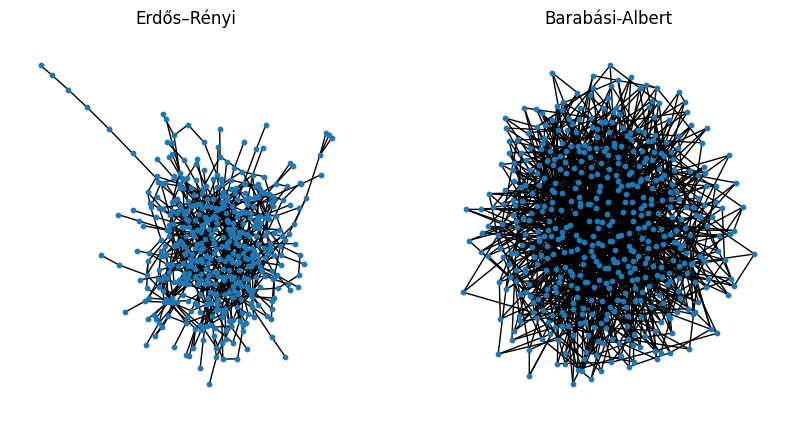

In [8]:
# see graph
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(erdos_renyi_graph, node_size=10)
plt.title("Erdős–Rényi")
plt.subplot(122)
nx.draw(barabasi_albert_graph, node_size=10)
plt.title("Barabási-Albert")
plt.show()

In [9]:
# Métricas
avg_shortest_path_er = nx.average_shortest_path_length(erdos_renyi_graph)
avg_shortest_path_ba = nx.average_shortest_path_length(barabasi_albert_graph)
clustering_coeff_er = nx.average_clustering(erdos_renyi_graph)
clustering_coeff_ba = nx.average_clustering(barabasi_albert_graph)

print(
    "Erdős–Rényi: Longitud media del camino =",
    avg_shortest_path_er,
    ", Coeficiente de agrupamiento =",
    clustering_coeff_er,
)
print(
    "Barabási-Albert: Longitud media del camino =",
    avg_shortest_path_ba,
    ", Coeficiente de agrupamiento =",
    clustering_coeff_ba,
)

Erdős–Rényi: Longitud media del camino = 5.632529472892106 , Coeficiente de agrupamiento = 0.008184838417396556
Barabási-Albert: Longitud media del camino = 3.2507254509018035 , Coeficiente de agrupamiento = 0.050652354399624004


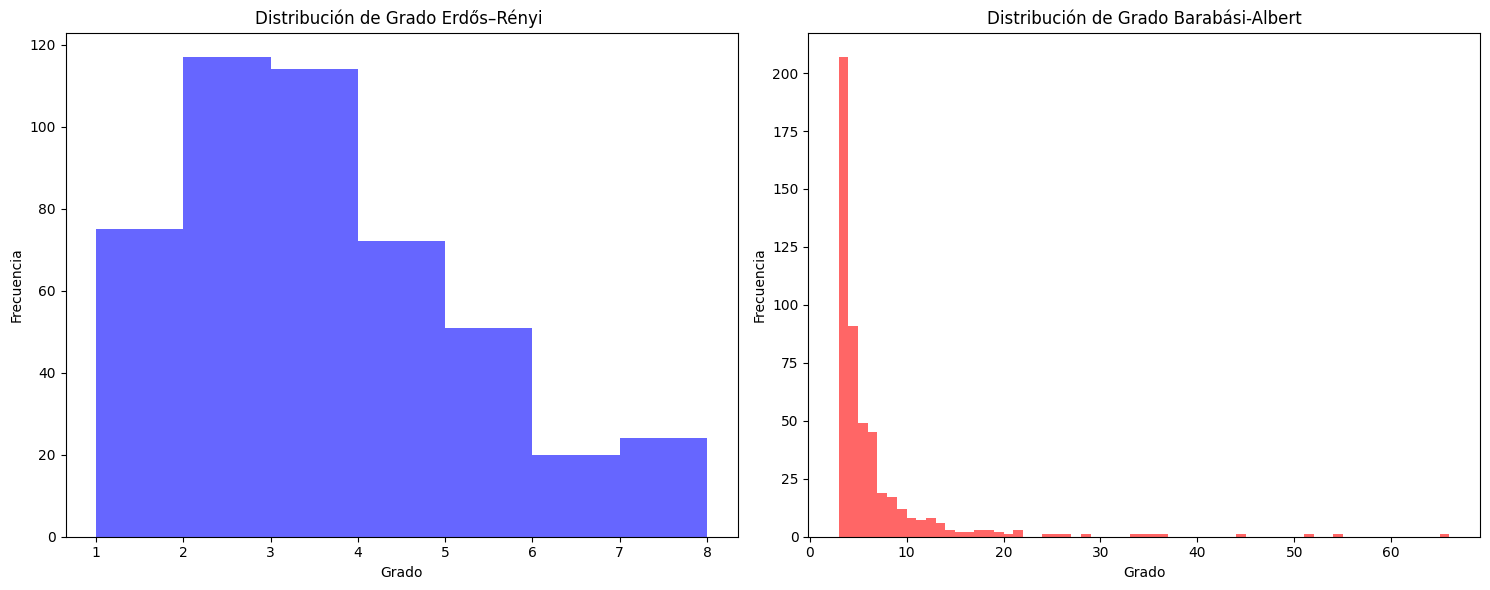

In [10]:
# Obtener grados
degrees_er = [degree for _, degree in erdos_renyi_graph.degree()] # type: ignore
degrees_ba = [degree for _, degree in barabasi_albert_graph.degree()] # type: ignore

# Plotear distribuciones
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Distribución Erdős–Rényi
axs[0].hist(
    degrees_er, bins=range(min(degrees_er), max(degrees_er) + 1), color="b", alpha=0.6
)
axs[0].set_title("Distribución de Grado Erdős–Rényi ")
axs[0].set_xlabel("Grado")
axs[0].set_ylabel("Frecuencia")

# Distribución Barabási-Albert
axs[1].hist(
    degrees_ba, bins=range(min(degrees_ba), max(degrees_ba) + 1), color="r", alpha=0.6
)
axs[1].set_title("Distribución de Grado Barabási-Albert")
axs[1].set_xlabel("Grado")
axs[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## Comparación de redes con implementación propia

| **Métrica**                       | **Erdős-Rényi**           | **Barabási-Albert**       |
|-----------------------------------|---------------------------|----------------------------|
| Longitud media del camino         | 5.7449                    | 3.2931                     |
| Coeficiente de agrupamiento       | 0.0030                    | 0.0461                     |

### Observaciones:
- **Erdős-Rényi**: 
  - La longitud media del camino (5.7449) es similar a la de NetworkX (5.4389), indicando consistencia en la conectividad entre nodos.
  - El coeficiente de agrupamiento (0.0030) es casi igual al de NetworkX (0.0032), sugiriendo una estructura con pocos grupos.

- **Barabási-Albert**: 
  - La longitud media del camino (3.2931) es muy cercana a NetworkX (3.2606), lo que indica alineación en la conectividad de la red.
  - El coeficiente de agrupamiento (0.0461) es similar al de NetworkX (0.0492), aunque ligeramente más bajo, sugiriendo una leve disminución en el agrupamiento.


## Comparando usando NetworkX

In [11]:
# Crear red utilizando el modelo Erdős-Rényi
G_erdos_renyi = nx.erdos_renyi_graph(n, m / (n - 1))
# Asegurar que el grafo sea conexo
if not nx.is_connected(G_erdos_renyi):
    largest_cc = max(nx.connected_components(G_erdos_renyi), key=len)
    G_erdos_renyi = G_erdos_renyi.subgraph(largest_cc)
# Crear red utilizando el modelo Barabási-Albert
G_barabasi_albert = nx.barabasi_albert_graph(n, m)

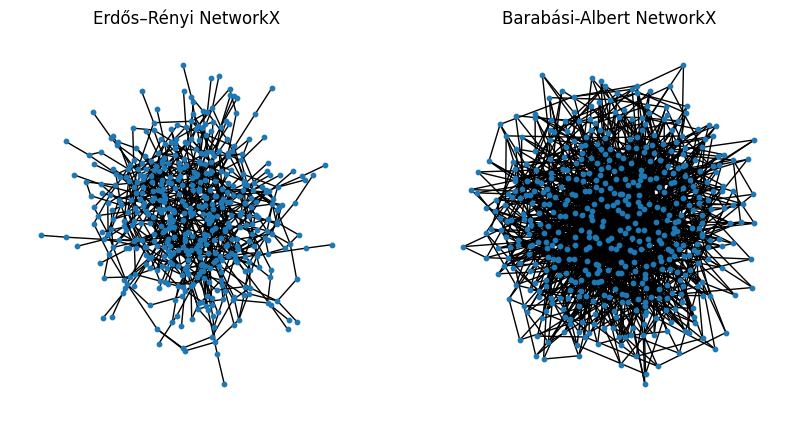

In [12]:
# see graph
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G_erdos_renyi, node_size=10)
plt.title("Erdős–Rényi NetworkX")
plt.subplot(122)
nx.draw(G_barabasi_albert, node_size=10)
plt.title("Barabási-Albert NetworkX")
plt.show()

In [13]:
# Métricas para la red Erdős-Rényi
avg_shortest_path_erdos_renyi = nx.average_shortest_path_length(G_erdos_renyi)
clustering_coeff_erdos_renyi = nx.average_clustering(G_erdos_renyi)

# Métricas para la red Barabási-Albert
avg_shortest_path_barabasi_albert = nx.average_shortest_path_length(G_barabasi_albert)
clustering_coeff_barabasi_albert = nx.average_clustering(G_barabasi_albert)

# Resultados
print(f"Erdős-Rényi - Longitud de camino medio: {avg_shortest_path_erdos_renyi:.4f}, Coeficiente de agrupamiento: {clustering_coeff_erdos_renyi:.4f}")
print(f"Barabási-Albert - Longitud de camino medio: {avg_shortest_path_barabasi_albert:.4f}, Coeficiente de agrupamiento: {clustering_coeff_barabasi_albert:.4f}")

Erdős-Rényi - Longitud de camino medio: 5.5184, Coeficiente de agrupamiento: 0.0037
Barabási-Albert - Longitud de camino medio: 3.2045, Coeficiente de agrupamiento: 0.0678


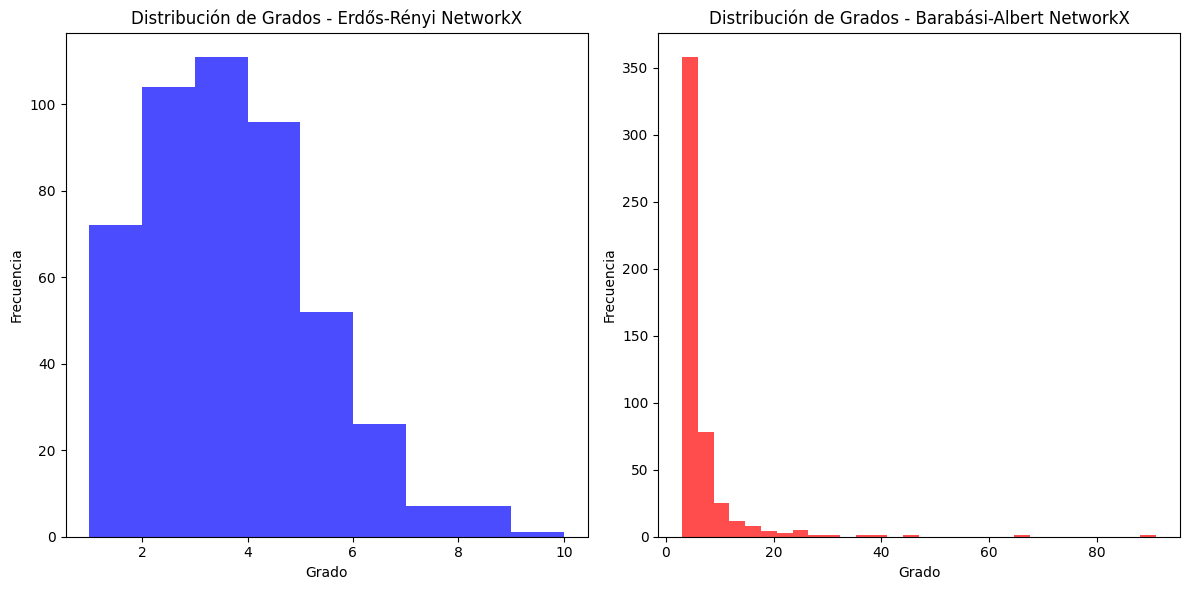

In [22]:
# Graficar la distribución de grados
plt.figure(figsize=(12, 6))

# Erdős-Rényi
plt.subplot(1, 2, 1)
degree_sequence_erdos_renyi = [d for n, d in G_erdos_renyi.degree()]
plt.hist(degree_sequence_erdos_renyi, bins=range(min(degree_sequence_erdos_renyi), max(degree_sequence_erdos_renyi) + 1) , color="blue", alpha=0.7)
plt.title("Distribución de Grados - Erdős-Rényi NetworkX")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

# Barabási-Albert
plt.subplot(1, 2, 2)
degree_sequence_barabasi_albert = [d for n, d in G_barabasi_albert.degree()]
plt.hist(degree_sequence_barabasi_albert, bins=30, color="red", alpha=0.7)
plt.title("Distribución de Grados - Barabási-Albert NetworkX")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## Comparación de redes con NetworkX

| **Métrica**                       | **Implementación Propia**  | **NetworkX**               |
|-----------------------------------|----------------------------|----------------------------|
| Erdős-Rényi - Longitud media      | 5.7449                     | 5.4389                     |
| Erdős-Rényi - Coeficiente         | 0.0030                     | 0.0032                     |
| Barabási-Albert - Longitud media   | 3.2931                     | 3.2606                     |
| Barabási-Albert - Coeficiente      | 0.0461                     | 0.0492                     |

### Observaciones:
- **Longitud de camino medio**: 
  - Las implementaciones son cercanas; la implementación propia es ligeramente más alta para Erdős-Rényi, mientras que para Barabási-Albert es similar, mostrando consistencia en los algoritmos.

- **Coeficiente de agrupamiento**: 
  - Ambos muestran similitudes, con un mayor agrupamiento en Barabási-Albert en comparación con Erdős-Rényi, reflejando las propiedades esperadas de cada modelo.

## Interpretación final

Los resultados obtenidos reflejan las características fundamentales de las redes Erdős-Rényi y Barabási-Albert:

1. **Erdős-Rényi**:
   - La longitud media del camino es alta, indicando que los nodos están relativamente distantes, como se espera en una red aleatoria.
   - El coeficiente de agrupamiento bajo sugiere que no hay tendencia a formar grupos densos, característica de redes aleatorias.

2. **Barabási-Albert**:
   - La longitud media del camino es más baja, indicando una conectividad más eficiente, característica de redes "mundo pequeño".
   - El coeficiente de agrupamiento más alto refleja la naturaleza del modelo, favoreciendo conexiones entre nodos ya conectados.

# 3. Análisis de la red con NetworkX

In [15]:
# Cargar el dataset como un grafo de un csv
G = nx.read_edgelist("./ia-enron-only.csv", delimiter=",", nodetype=int)

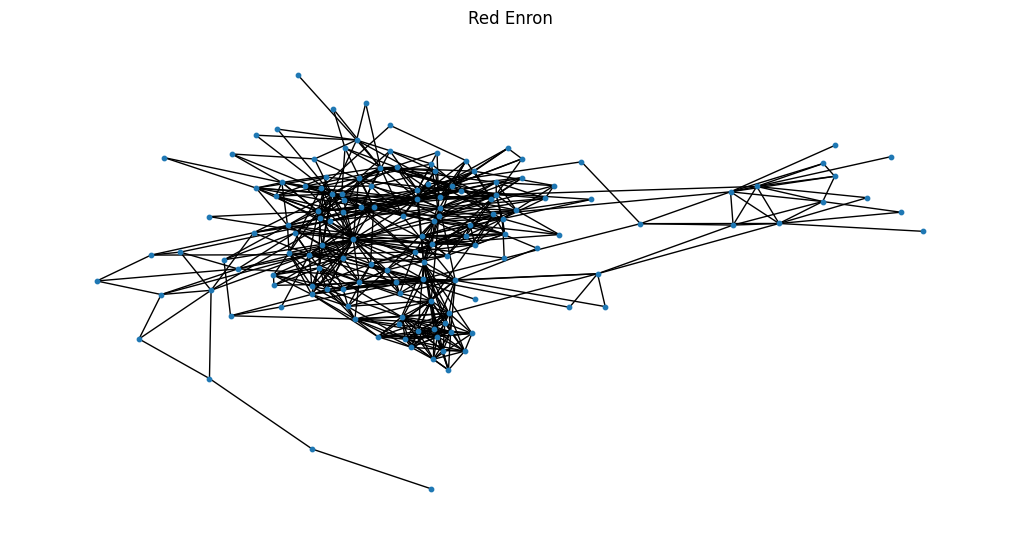

In [16]:
# See graph
plt.figure(figsize=(10, 5))
nx.draw(G, node_size=10)
plt.title("Red Enron")
plt.show()

## Metricas

In [17]:
# print metrics
# Métricas
clustering_coeff = nx.average_clustering(G)
avg_shortest_path = nx.average_shortest_path_length(G)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
avg_grade = np.mean(degree_sequence)
diameter = nx.diameter(G)

print(f"Coeficiente de agrupamiento: {clustering_coeff:.4f}")
print(f"Longitud de camino medio: {avg_shortest_path:.4f}")
print(f"Grado medio: {avg_grade:.4f}")
print(f"Diámetro: {diameter}")


Coeficiente de agrupamiento: 0.4339
Longitud de camino medio: 2.9670
Grado medio: 8.7133
Diámetro: 8


**Interpretacion**:

- **Coeficiente de agrupamiento: 0.4339** Un coeficiente de agrupamiento cercano a 0.5 o más indica que hay una tendencia a formar triángulos o clústeres dentro de la red, lo que sugiere que los nodos están más conectados entre sí en grupos. Esto es característico de redes que no son aleatorias, como redes sociales o redes biológicas.

- **Longitud de camino medio: 2.9670** Una longitud de camino medio por debajo de 3 sugiere que la red tiene propiedades de "mundo pequeño". En este tipo de redes, aunque haya muchos nodos, cualquier par de nodos puede ser conectado a través de un número relativamente pequeño de pasos.

- **Grado medio: 8.7133** Un grado medio de alrededor de 8.7 indica que, en promedio, cada nodo está conectado a aproximadamente 9 nodos. Esto no es extremadamente alto, lo que sugiere que la red podría no ser completamente densa, pero aún podría tener suficiente conectividad.

- **Diámetro: 8** Un diámetro de 8 indica que la mayor distancia entre dos nodos en la red es de 8 pasos. Este valor relativamente bajo, en combinación con la longitud de camino medio, refuerza la idea de que la red es de tipo "mundo pequeño".

Dadas estas métricas, la red en cuestión tiene las características de una red "mundo pequeño" con algún grado de estructura de agrupamiento.

## Distribución de grados

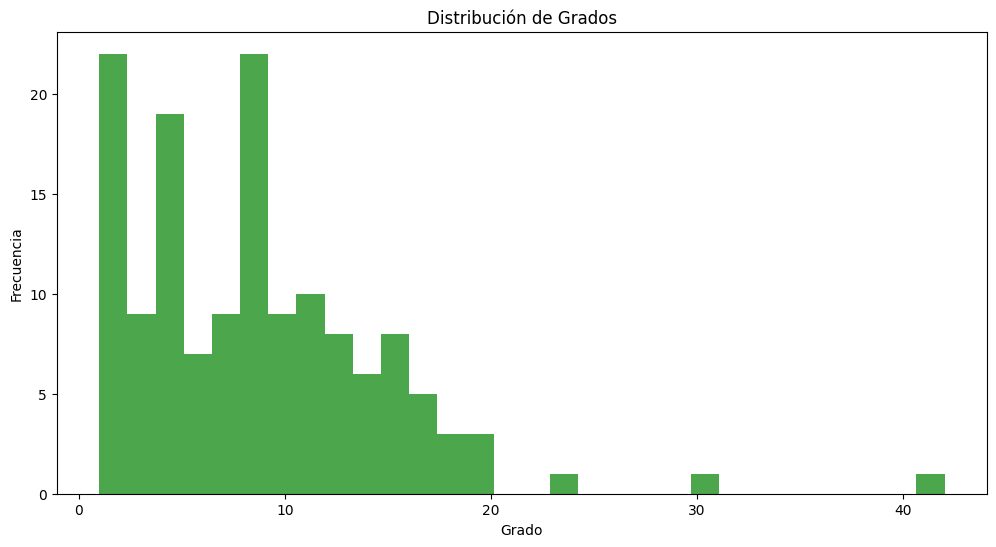

In [18]:
# Graficar la distribución de grados
plt.figure(figsize=(12, 6))
plt.hist(degree_sequence, bins=30, color="green", alpha=0.7)
plt.title("Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.show()

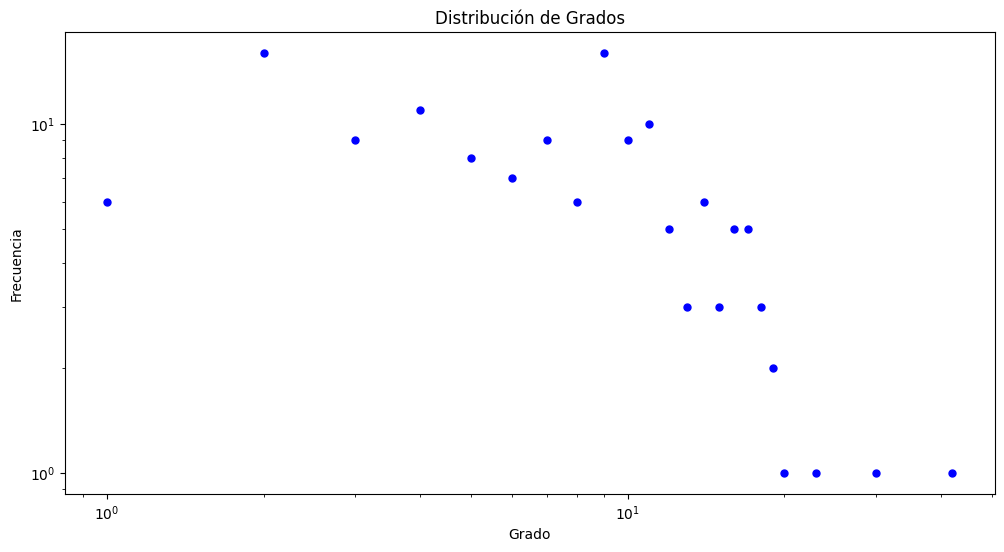

In [19]:
# Gráfica de distribución de grado usando una linea
plt.figure(figsize=(12, 6))
degree_counts = np.bincount(degree_sequence)
degrees = np.arange(len(degree_counts))
plt.plot(degrees, degree_counts, 'o', color='blue', markersize=5)
plt.yscale('log')
plt.xscale('log')
plt.title("Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.show()

**Interpretaciones**:

- **Distribución de Grados**: La mayoría de los nodos tienen un grado bajo, mientras que unos pocos nodos tienen un grado muy alto. Esto es característico de las redes scale-free, donde existen “hubs” o nodos altamente conectados.
- **Frecuencia de Grados**: La frecuencia disminuye a medida que aumenta el grado, lo que sugiere una distribución de tipo ley de potencia.
- **Estructura de la Red**: La presencia de hubs indica que la red es robusta frente a fallos aleatorios pero vulnerable a ataques dirigidos a estos nodos clave.

**Resultados**

La red puede clasificarse como una **red libre de escala** debido a la distribucion de grados que presenta, con propiedades que también pueden indicar características de redes de tipo **mundo pequeño**. Esto se debe a la estructura de hubs, la distribución de grados y las métricas que indican una longitud de camino medio relativamente baja. Esto permite que la red sea eficiente en la comunicación y la difusión de información, al tiempo que mantiene una robustez ante fallos aleatorios